# Imports and Functions

In [26]:
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [207]:
def null_hypothesis_accepted(Z, z):
    if Z > z: # reject H0
        print('H0 rejected', 'Z =', Z, '/ ', 'z =', z)
        return False
    else:
        print('H0 accepted', 'Z =', Z, '/ ', 'z =', z)
        return True

def Z_score(mu0, sigma0, n, x_bar):
    return abs((x_bar - mu0) / (sigma0 / np.sqrt(n - 1)))

In [5]:
# probability
st.norm.cdf(4)

0.9999683287581669

In [6]:
# signifikanz niveau
st.t.cdf(4)

TypeError: _parse_args() missing 1 required positional argument: 'df'

In [14]:
sample = st.norm.rvs(loc=100, scale=26, size=100)

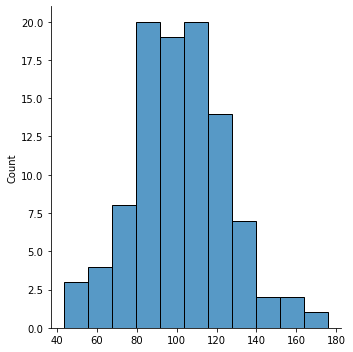

In [15]:
sns.displot(sample)

In [26]:
sample = st.expon.rvs(scale=10, size=100, random_state=42)

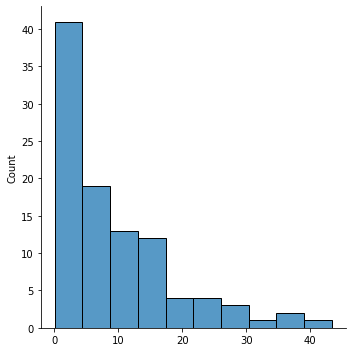

In [27]:
sns.displot(sample)

In [110]:
simulated_layers = []
temp_x = []
temp_y = []
for x in range(100000):
    simulated_layers.append(st.norm.rvs(size=8, loc=12, scale=1))
    if x % 1000 == 0:
        heights = []
        for layer in simulated_layers:
            heights.append(layer.sum())

        temp_x.append(x)
        temp_y.append(sum(list(filter(lambda h: h > 104, heights))) / len(heights))

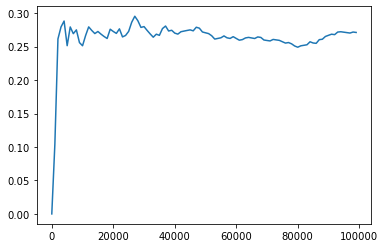

In [111]:
plt.plot(temp_x, temp_y)

In [116]:
simulated_layers = []
temp_x = []
temp_y = []
for x in range(100000):
    simulated_layers.append(st.norm.rvs(size=8, loc=12, scale=1))
    if x % 1000 == 0:
        heights = []
        for layer in simulated_layers:
            heights.append(int(layer.sum()))

        probability_doesnt_fit = sum(list([1 for height in heights > 104])) / len(heights)

        temp_x.append(x)
        temp_y.append(probability_doesnt_fit)

TypeError: '>' not supported between instances of 'list' and 'int'

In [30]:
simulated_layers

[array([12.29009431, 12.2319791 , 10.5206518 , 12.36881886, 12.25472348,
        11.43406658, 11.37085182, 11.71701861]),
 array([13.42214581, 11.94147205, 11.7192542 , 13.82424766, 12.28930905,
        12.66135629, 13.14581042, 12.69589062]),
 array([12.63705625, 13.06228948, 11.59658448, 12.76209495, 12.7485209 ,
        14.09375568, 11.53925918, 10.94400294]),
 array([11.63962326,  9.81883545, 13.41332329, 11.10783008, 12.90468816,
        12.39224464, 13.02508185, 11.26806587]),
 array([12.39952443, 10.69068765, 12.12183663, 10.48299335, 11.40558459,
        12.83268258, 11.08771215, 13.31694622]),
 array([12.87515895, 13.71157013, 11.66136413, 14.43251015, 10.98429679,
        13.39690407, 12.40924335, 11.58771475]),
 array([10.37114605, 11.21945895, 12.562093  , 10.68603772, 10.01722914,
        10.4664299 , 10.47895715, 13.14311322]),
 array([ 9.67919308, 11.86809272, 12.18808291, 12.5846168 , 10.92977008,
        13.33795328, 10.77543838, 14.2483638 ]),
 array([11.6525906 , 11.

In [31]:
heights = []
for layer in simulated_layers:
    heights.append(layer.sum())

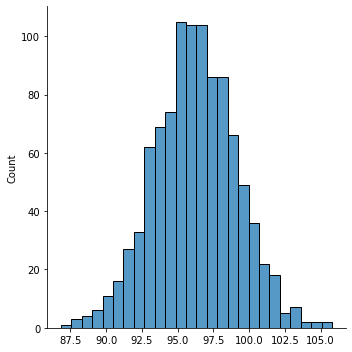

In [33]:
sns.displot(heights)

In [113]:
sum(list(filter(lambda h: h > 104, heights))) / len(heights)

0.27110399887049763

# Fussgängerbrücke

In [58]:
runs = 1000000

In [70]:
bridge_resistance = np.array(st.norm.rvs(loc=5000, scale=150, size=runs))

# scale for expon is defined as: 1 / lambda
bridge_load = np.array(st.expon.rvs(scale=(1 / 0.001), size=runs))

In [71]:
sum(bridge_load > bridge_resistance) / runs

0.006853

# Buchen vs. Tannen Höhe

In [75]:
tannen = [45, 49, 47, 38, 53, 30, 34]

In [77]:
np.size(tannen)

7

In [78]:
np.mean(tannen)

42.285714285714285

In [79]:
# Standard Error
np.std(tannen, ddof=1) / np.sqrt(np.size(tannen))

3.190120804656043

In [83]:
buchen = [41, 37, 32, 24, 45, 23, 35, 41, 24]

In [84]:
np.size(buchen)

9

In [85]:
np.mean(buchen)

33.55555555555556

In [86]:
np.std(buchen, ddof=1) / np.sqrt(np.size(buchen))

2.769431906803226

In [93]:
t_value = (np.mean(tannen) - np.mean(buchen)) / np.sqrt((np.var(tannen, ddof=1)/np.size(tannen)) + (np.var(buchen, ddof=1)/np.size(buchen)))

In [100]:
# degrees of freedom for both samples
(np.size(tannen) + np.size(buchen)) - 2

14

In [101]:
# 14 = number of observations in both samples
st.t.cdf(t_value, 14)

0.9711028862893305

In [102]:
p_value = (1 - st.t.cdf(t_value, 14)) * 2
p_value

0.057794227421338995

# Serie 11

## Aufgabe 5

TODO: change to students-t

In [202]:
# H0: mu0 = 500g
# H1: mu0 != 500g
data = [495, 502, 505, 498, 490, 500]
x_bar = np.mean(data)
x_bar

498.3333333333333

In [208]:
# standard_error can't be calculated, population std missing???
st.norm.ppf(0.95, loc=500, scale=np.std(data))

507.98314343732557

In [209]:
Z = Z_score(500, np.std(data), len(data), np.mean(data))
Z

0.7678688960424477

In [211]:
a = 0.05
prop = 1 - (2 * a) # two-sided test
z = st.norm.ppf(prop)
z

1.2815515655446004

In [212]:
null_hypothesis_accepted(Z, z)

H0 accepted Z = 0.7678688960424477 /  z = 1.2815515655446004


True

# Serie 14

## Aufgabe 79

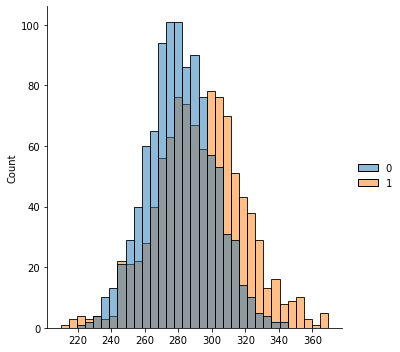

In [11]:
drive_shaft_1 = st.norm.rvs(loc=280, scale=20, size=1000)
drive_shaft_2 = st.norm.rvs(loc=292, scale=25, size=1000)
sns.displot([drive_shaft_1, drive_shaft_2])

In [28]:
# Stichprobe mit n = 25
N = 25

drive_shaft_sample_1 = st.norm.rvs(loc=280, scale=math.sqrt(20), size=25)
drive_shaft_sample_2 = st.norm.rvs(loc=292, scale=math.sqrt(25), size=25)

In [29]:
pd.DataFrame(drive_shaft_sample_1).describe()

,0
count,25.000000
mean,278.694999
std,3.629621
min,272.677986
25%,276.481738
50%,277.787848
75%,281.386450
max,285.312349


pd.DataFrame(drive_shaft_sample_2).describe()

In [31]:
mu_s1 = np.mean(drive_shaft_sample_1)
print(mu_s1)
mu_s2 = np.mean(drive_shaft_sample_2)
print(mu_s2)

278.6949992625826
292.4399919816206


In [53]:
st.norm.pdf(0)

0.3989422804014327

H0: mu = 280 MPa
H1: mu != 280 MPa

### a) Bestimmmen sie die Grenze c bei gegebener Irrtumswahrscheinlichkeit α = 0.05.
Wie groß ist in diesem Fall die Irrtumswahrscheinlichkeit 2. Art, β?

PPF:
Density functions return the probability of an observation in the distribution. Recall the definitions of the PDF and CDF as follows:

Probability Density Function (PDF): Returns the probability for an observation having a specific value from the distribution.
Cumulative Density Function (CDF): Returns the probability for an observation equal to or lesser than a specific value from the distribution.
In order to calculate a critical value, we require a function that, given a probability (or significance), will return the observation value from the distribution.

Specifically, we require the inverse of the cumulative density function, where given a probability, we are **given the observation value that is less than or equal to the probability**.
--> This is called the percent point function (PPF), or more generally the quantile function.

In [80]:
# critical value c so that there is only a 5% chance of rejecting H0 even if it is true
critical_value_c = st.norm.ppf(0.95, loc=280, scale=np.sqrt(20)) # based on one-sided test and alpha of 0.05
print(critical_value_c, 'MPa')

287.35600904580116 MPa


In [79]:
# Error Type 2 - how high is probability (cdf) that we falsely accept H0 and the part is actually from the other distribution
error_type_2_prob = st.norm.cdf(critical_value_c, loc=292, scale=np.sqrt(25))
print((error_type_2_prob * 100).round(2), '%')

17.65 %


### b) die Grenze c bei gegebener Irrtumswahrscheinlichkeit β = 0.2.
Wie groß ist in diesem Fall die Irrtumswahrscheinlichkeit 1. Art, α?

In [82]:
# choose critical value so that probability of β error becomes 0.2
critical_value_c = st.norm.ppf(0.2, loc=292, scale=np.sqrt(25))
print(critical_value_c, 'MPa')

287.79189383213543 MPa


In [85]:
# calculate α when critical value based on β error 0.2
error_type_1_prob = 1 - st.norm.cdf(critical_value_c, loc=280, scale=np.sqrt(20))
print((error_type_1_prob * 100).round(2), '%')

4.07 %


#### c) die Grenze c, falls beide Irrtumswahrscheinlichkeiten gleich groß sein sollen, d.h. α = β?

In [107]:
critical_value_list = np.arange(280, 290, 0.001)

# c_critical_value so that
def prob_type1_error(c):
    return 1 - st.norm.cdf(c, loc=280, scale=np.sqrt(20))

# equals
def prob_type2_error(c):
    return st.norm.cdf(c, loc=292, scale=np.sqrt(25))

prob_type1_error_list = [prob_type1_error(c) for c in critical_value_list]
prob_type2_error_list = [prob_type2_error(c) for c in critical_value_list]

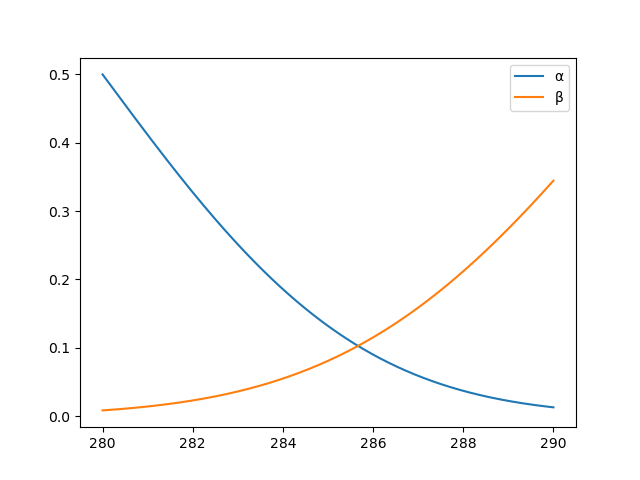

In [135]:
%matplotlib widget
plt.plot(critical_value_list, prob_type1_error_list, label = 'α')
plt.plot(critical_value_list, prob_type2_error_list, label = 'β')
plt.legend()
plt.show()

**Result**: Alpha and Beta errors are equal around when c = 285.67 MPa

### d) Wie groß müsste man den Stichprobenumfang n wählen, damit beide Irrtumswahrscheinlichkeiten gleich groß sind und höchstens gleich 0.02 sind?

In [ ]:
# 4x sample size for 2x reduction in probability of error

# wo muss n = 25 berücksichtigt werden???

## Aufgabe 80

In [35]:
sample = [33, 31, 30, 29, 24, 27, 28, 31, 25, 23]

In [42]:
pd.DataFrame(sample).describe()

,0
count,10.000000
mean,28.100000
std,3.314949
min,23.000000
25%,25.500000
50%,28.500000
75%,30.750000
max,33.000000


In [69]:
Z = (np.mean(sample) - 27) / (2 / math.sqrt(10)) # Z score
Z

(272.64399095419884, 287.35600904580116)

In [69]:
z = 1.96 # z critical value (0.975 in z-table based on a = 0.05 and two-sided testing)
z

(272.64399095419884, 287.35600904580116)

In [46]:
# With Z-Test:
# if Z score > z critical value: Reject H0
Z > z

False

Mit einem 5% Signifikanzniveau gibt es statistische Evidenz dafür, dass die durchschnittliche Kerbschlagsarbeit 27 J ist. **H0 wird akzeptiert**.

In [47]:
# With T-Test:
t = 2.62 # t critical value (t-table based on a = 0.05 two tailed with dof 10 - 1 = 9
t

2.62

In [48]:
Z > t

False

Hypothese H0 wird auch mit dem T-Test (# of samples < 30) akzeptiert

## Aufgabe 81

In [119]:
# population: mü = 100 kg and std = 1.5 kg
# sample with 225 bags: x_bar = 99.75 kg
# H0: mü0 = 100 kg
# H1: mü0 != 100 kg
# alpha = 0.02

In [152]:
# calc the standardized statistic value
standard_error = 1.5 / np.sqrt(225 - 1) # for sample, so dof = 1
Z = abs((99.75 - 100) / standard_error)
print('Z-score:', Z)

Z-score: 2.494438257849294


In [153]:
a = 0.02
prop = 1 - (a * 2)
z = st.norm.ppf(prop) # two-sided test
print('z-value [critical value]:', z)

z-value [critical value]: 1.7506860712521692


In [154]:
# check test result
if Z > z: # reject H0
    print('H0 rejected', 'Z =', Z, '/ ', 'z =', z)
else:
    print('H0 accepted', 'Z =', Z, '/ ', 'z =', z)

H0 rejected Z = 2.494438257849294 /  z = 1.7506860712521692


at 2% significance level statistical evidence that mean weight is NOT 100 kg.

## Aufgabe 82

In [ ]:
# H0: μ0 >= 12000 km
# H1: μ0 < 12000 km
# σ0 = 850
# Sample: n = 100 α = 0.03

In [155]:
standard_error = 850 / np.sqrt(100 - 1) # of sample with dof = 1

In [156]:
# using standard error
st.norm.ppf(0.03, loc=12000, scale=standard_error)

11839.327160594365

Der Erwartungswert der Laufleistung muss den Wert von 11'839 km unterschreiten!

In [158]:
# what's the meaning of this in that context???
# using population standard deviation
st.norm.ppf(0.03, loc=12000, scale=850)

10401.325433071437

## Aufgabe 83

In [159]:
# Exhaust max. 250 mg NOx / km
# σ0 = 34 mg
# Sample: n = 100 and x_bar = 255 mg / km

# H0: μ0 <= 250 mg
# H1: μ0 > 250 mg

#### a) Kann die Vermutung der Behörde mit einer Irrtumswahrscheinlichkeit von α = 0.05 bestätigt werden?

In [161]:
standard_error = 34 / np.sqrt(10 - 1)
standard_error

11.333333333333334

In [164]:
Z = (255 - 250) / standard_error # standardized Z-score
Z

0.4411764705882353

In [166]:
a = 0.05
prop = 1 - 0.05 # assuming one-sided test to the right
z = st.norm.ppf(prop)
z

1.6448536269514722

In [168]:
# Check result
null_hypothesis_accepted(Z, z)

H0 accepted Z = 0.4411764705882353 /  z = 1.6448536269514722


True

Null hypothesis accepted - no statistical evidence at alpha of 0.05 that exhaust too high

#### b) Wie viele Fahrzeuge müssten getestet werden, um bei gleichbleibendem Mittelwert und Standardabweichung die Vermutung der Behörde mit einer Irrtumswahrscheinlichkeit von α = 0.05 bestätigen zu können?

Z müsste grösser als z (1.6448536269514722) werden

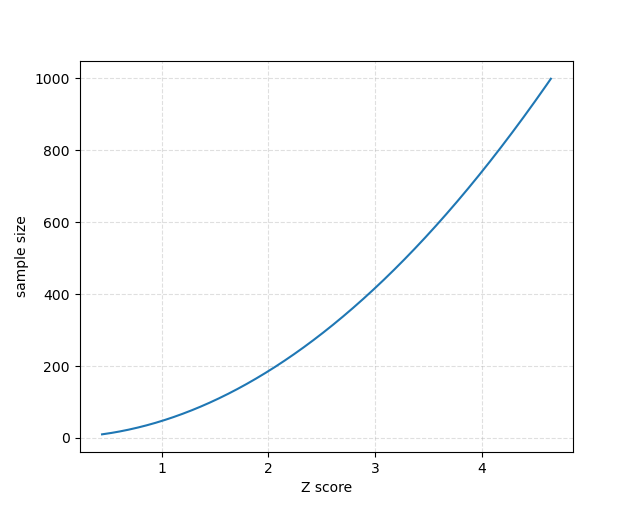

In [199]:
sample_sizes = np.arange(10, 1000, 1)

Z_scores = [Z_score(mu0=250, sigma0=34, n=size, x_bar=255) for size in sample_sizes]

plt.clf()
plt.plot(Z_scores, sample_sizes)
plt.xlabel('Z score')
plt.ylabel('sample size')
plt.grid(alpha=.4,linestyle='--')
plt.show()

In [200]:
df = pd.DataFrame(Z_scores)
first_index_Z_bigger_than_z = df.index[df[0] > 1.6448536269514722].tolist()[0]
print('sample size for H0 to get rejected:', sample_sizes[first_index_Z_bigger_than_z])

sample size for H0 to get rejected: 127


## other random stuff

In [57]:
c = st.norm.interval(0.90, loc=280, scale=np.sqrt(20)) # if this would be two-sided...

0.95


In [23]:
Z_score = ( - 280)
st.norm.cdf(0.9999)

z_value = 1 - 0.05
print(z_value)

-13.90424095575864

In [ ]:
Z_score = (mu_s1 - mu_s2) / (np.std(drive_shaft_sample_1) / math.sqrt(N))
Z_score

In [18]:
# drive shafts 1
st.norm.interval(0.05, loc=280, scale=math.sqrt(20)/math.sqrt(N))

(291.9372932220568, 292.0627067779432)

In [44]:
# drive shafts 2
st.norm.interval(0.05, loc=292, scale=math.sqrt(25)/math.sqrt(N))

1.7392527130926108